In [1]:
##Importing the packages
#Data processing packages
import numpy as np
import pandas as pd

#Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#connecting google drive with google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
#loading dataset
data=pd.read_csv('/content/drive/MyDrive/VODAFONE/WA_Fn-UseC_-HR-Employee-Attrition.csv',quoting=3)

In [ ]:
data.head()

In [ ]:
#Check and remediate if there are any null values
data.info()

In [ ]:
#Check and remove if there are any fields which does not add value
data['Over18'].value_counts()

In [ ]:
data.describe()

In [10]:
#These fields does not add value, hence removed
data = data.drop(['EmployeeCount','Over18'], axis = 1)

In [11]:
#A lambda function is a small anonymous function.
#A lambda function can take any number of arguments, but can only have one expression.
data['Attrition']=data['Attrition'].apply(lambda x : 1 if x=='Yes' else 0)

In [ ]:
#Convert Categorical values to Numeric Values
data.head()

In [13]:
#This function is used to convert Categorical values to Numerical values
data=pd.get_dummies(data)

In [ ]:
data.head()

In [15]:
#Separating Feature and Target matrices
X = data.drop(['Attrition'], axis=1)
y=data['Attrition']

In [16]:
#Feature scaling is a method used to standardize the range of independent variables or features of data.
#Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = scale.fit_transform(X)

In [17]:
# Split the data into Training set and Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2,random_state=42)

In [18]:
#Function to Train and Test Machine Learning Model
def train_test_ml_model(X_train,y_train,X_test,Model):
    model.fit(X_train,y_train) #Train the Model
    y_pred = model.predict(X_test) #Use the Model for prediction

    # Test the Model
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test,y_pred)
    accuracy = round(100*np.trace(cm)/np.sum(cm),1)

    #Plot/Display the results
    cm_plot(cm,Model)
    print('Accuracy of the Model' ,Model, str(accuracy)+'%')

In [19]:
#Function to plot Confusion Matrix
def cm_plot(cm,Model):
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Negative','Positive']
    plt.title('Comparison of Prediction Result for '+ Model)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

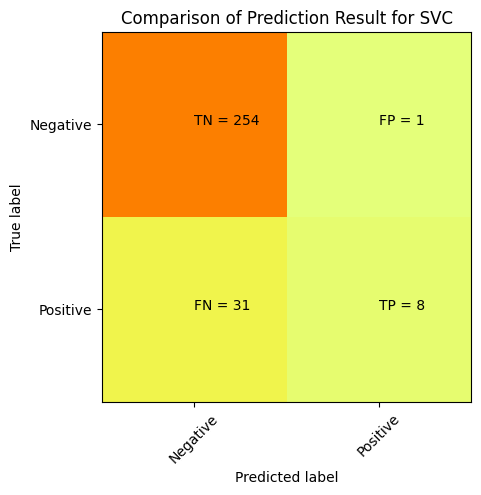

Accuracy of the Model SVC 89.1%


In [48]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "SVC"
model=SVC() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.svm import SVC,NuSVC  #Import packages related to Model
Model = "NuSVC"
model=NuSVC(nu=0.285)#Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

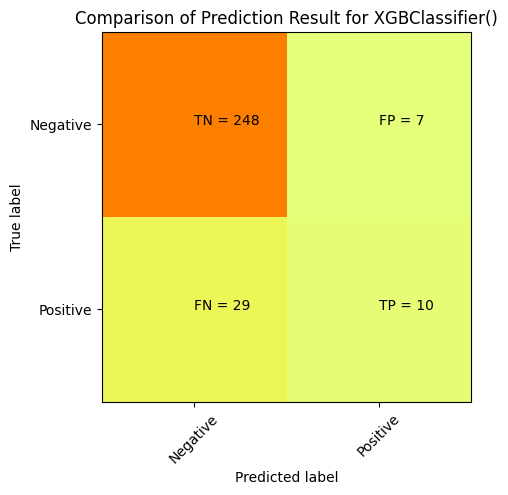

Accuracy of the Model XGBClassifier() 87.8%


In [47]:
from xgboost import XGBClassifier  #Import packages related to Model
Model = "XGBClassifier()"
model=XGBClassifier() #Create the Model

train_test_ml_model(X_train,y_train,X_test,Model)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
Model = "KNeighborsClassifier"
model=KNeighborsClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

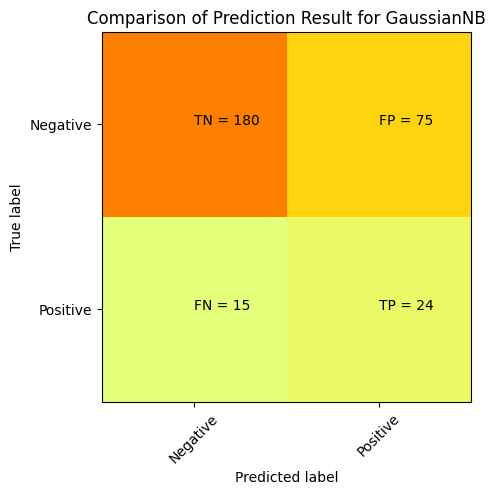

Accuracy of the Model GaussianNB 69.4%


In [46]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB  #Import packages related to Model
Model = "GaussianNB"
model=GaussianNB()

train_test_ml_model(X_train,y_train,X_test,Model)

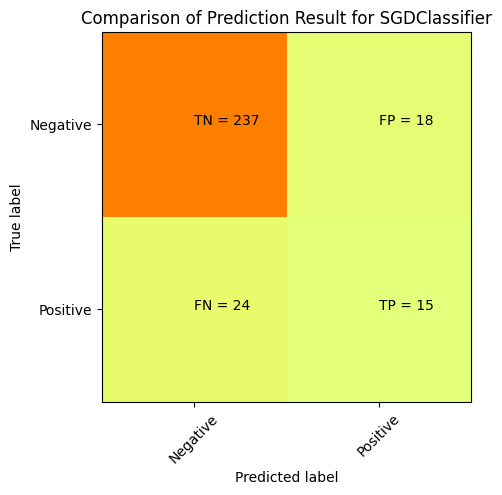

Accuracy of the Model SGDClassifier 85.7%


In [36]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "SGDClassifier"
model=SGDClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

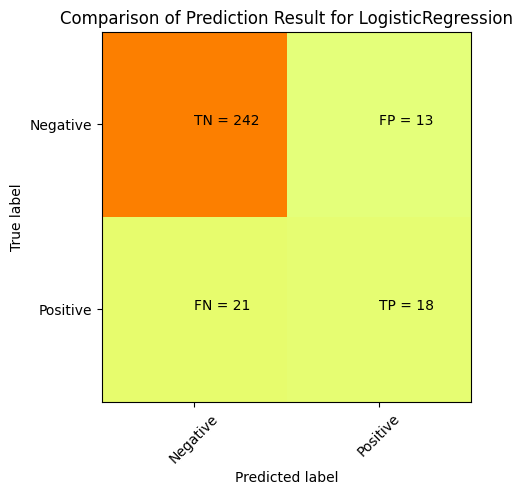

Accuracy of the Model LogisticRegression 88.4%


In [37]:
from sklearn.linear_model import SGDClassifier, LogisticRegression #Import packages related to Model
Model = "LogisticRegression"
model=LogisticRegression()

train_test_ml_model(X_train,y_train,X_test,Model)

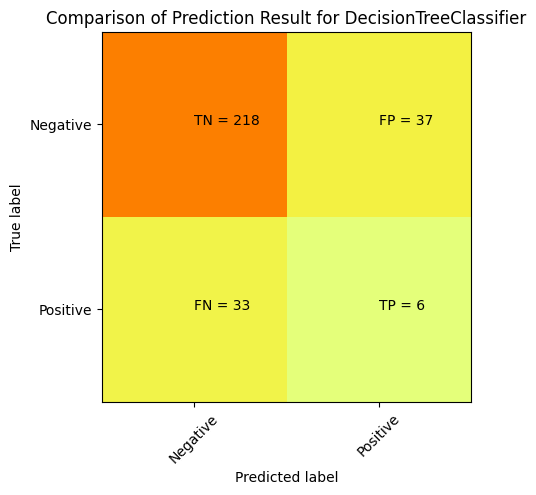

Accuracy of the Model DecisionTreeClassifier 76.2%


In [38]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "DecisionTreeClassifier"
model=DecisionTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

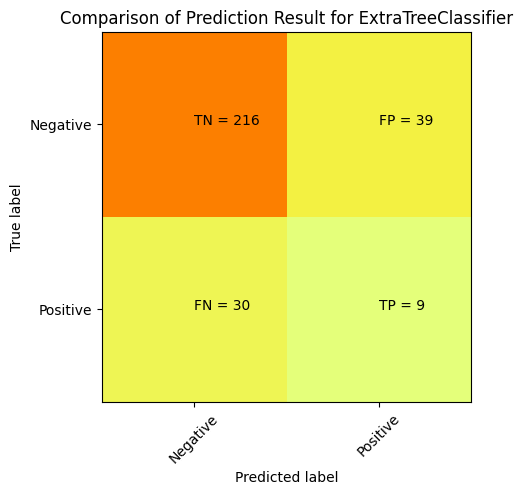

Accuracy of the Model ExtraTreeClassifier 76.5%


In [39]:
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier #Import packages related to Model
Model = "ExtraTreeClassifier"
model=ExtraTreeClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

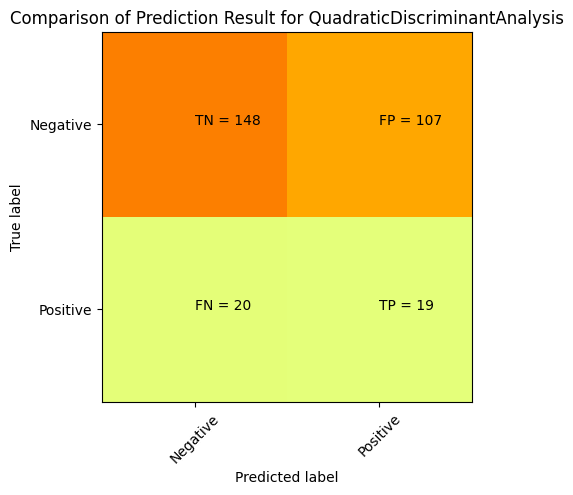

Accuracy of the Model QuadraticDiscriminantAnalysis 56.8%


In [40]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "QuadraticDiscriminantAnalysis"
model = QuadraticDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

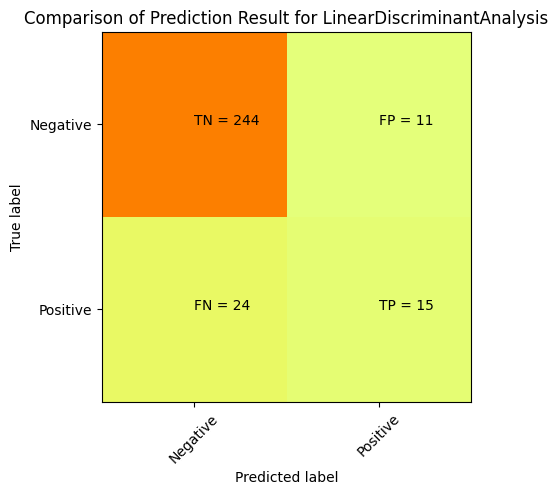

Accuracy of the Model LinearDiscriminantAnalysis 88.1%


In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis #Import packages related to Model
Model = "LinearDiscriminantAnalysis"
model=LinearDiscriminantAnalysis()

train_test_ml_model(X_train,y_train,X_test,Model)

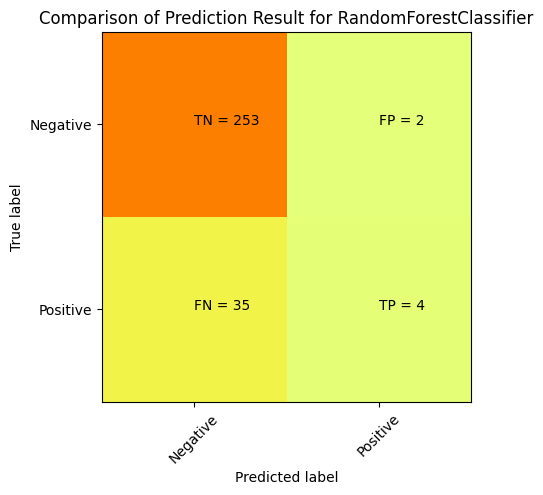

Accuracy of the Model RandomForestClassifier 87.4%


In [45]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "RandomForestClassifier"
model=RandomForestClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

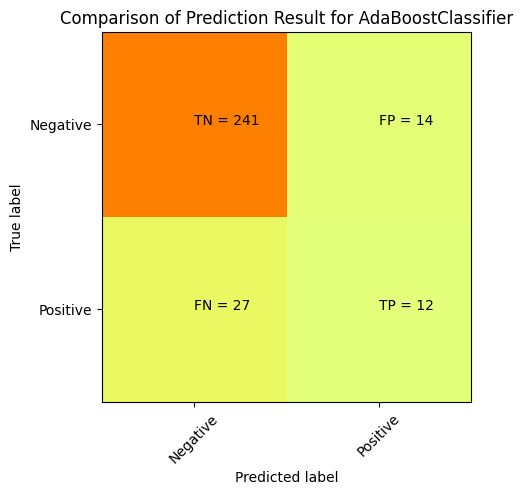

Accuracy of the Model AdaBoostClassifier 86.1%


In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "AdaBoostClassifier"
model=AdaBoostClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)

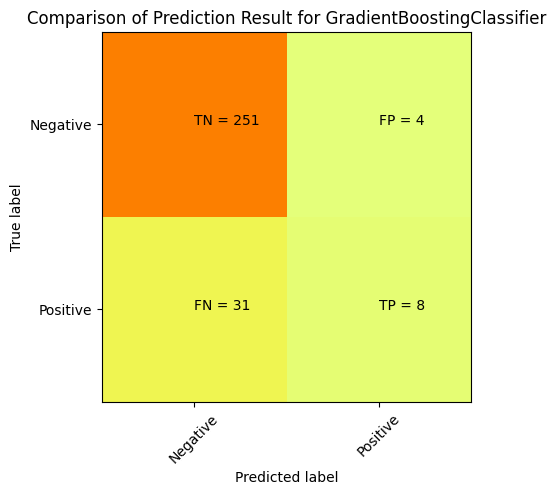

Accuracy of the Model GradientBoostingClassifier 88.1%


In [42]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier #Import packages related to Model
Model = "GradientBoostingClassifier"
model=GradientBoostingClassifier()

train_test_ml_model(X_train,y_train,X_test,Model)